In [1]:
import pandas as pd
import numpy as np

# Abstract
## Bank Marketing Dataset
### Problema comercial: 
Este dataset es sobre campañas de afiliación a los servicios de un banco portugues. Teniendo en cuenta lo costosas que son para el banco las campañas de marketing, necesita saber el comportamiento de sus clientes para con sus campañas y detectar de esa forma cuales son más eficientes y porque.

(Estas campañas fueron basadas en llamadas telefónicas para lograr la suscripción del cliente)

### Los insight que buscamos con este trabajo serán relacionados a efectividad de las campañas (si consiguieron un 'yes' o 'no')
Por eso identificamos que el valor más importante a destacar de este dataframe y con el cual vamos a querer trabajar mucho es el valor de la columna 'y' este nos dice si la camapaña consiguió la suscripción del cliente o no, el formato es de 'yes' y 'no' respectivamente. Hay otras columnas o valores que no son necesarios para el análisis de efectividad de la camapaña los cuales podemos ignorar y otras que no son imprescindibles pero nos podrán otorgar algún insight más también relacionado; como la educación de los posibles clientes, si tienen prestamos anteriores, casa, su estado marital, el tipo de trabajo que realizan.

### El objetivo final del análisis:
El objetivo final es un modelo predictivo de la efectividad que tendrá una campaña adicional, cuantos clientes podría conseguir teniendo en cuenta los distintos tipos de clientes (para esto nos apoyaremos en las variables 'job' y 'education' que son el rubro quese desempeña el cliente y su nivel de estudio). Puede ser de utilidad un modelo predictivo con el cual podamos predecir el exito de una campaña para un posible cliente de 'X' nivel de estudios alcanzado e 'Y' rubro en el cual se desempeña.

### Hipotesis y preguntas
¿Son las campañas telefonicas más efectivas entre las personas con estudios alcanzados más elevados? ¿Influye el tipo de trabajo que relaizan los posibles clientes?

# EDA

In [2]:
bank_df = pd.read_csv('bank-additional.csv',sep=';')

Luego de importar pandas y numpy nos traemos la data del csv que en este caso fué separada por ; en vez de , Pasamos a dar el 1er vistazo al DF

In [3]:
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


### A continuación iniciaremos los 1ros análisis epxloratorios más básicos, como el shape, el describe y un sample

In [4]:
bank_df.shape

(4119, 21)

In [5]:
# como no se llegan a visualizar todas las columnas, pediremos a Python que nos las liste
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
# le pediremos a python nos describa el dataframe con los indicadores básicos, el conteo, la media (promedio), el desvio estándard, el valor mínimo, los cuartiles y el valor máximo
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
# veremos una muestra aleatoria de 10 rows de esta dataframe
bank_df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
446,35,services,married,high.school,no,no,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
2247,53,management,married,university.degree,no,yes,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
2334,31,blue-collar,single,university.degree,no,no,no,cellular,jul,fri,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no
3591,30,management,single,university.degree,no,no,no,telephone,jun,thu,...,7,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
2550,44,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,4,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
3802,26,services,single,high.school,no,unknown,unknown,telephone,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
2813,38,self-employed,married,basic.9y,no,no,no,cellular,may,wed,...,4,999,1,failure,-1.8,92.893,-46.2,1.334,5099.1,no
18,45,entrepreneur,married,university.degree,unknown,yes,yes,cellular,aug,mon,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
3894,47,self-employed,married,university.degree,no,yes,no,cellular,aug,tue,...,7,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
2837,45,blue-collar,married,basic.6y,no,yes,no,telephone,jun,mon,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,no


#### Vamos a crear un filtro de los casos que la campaña consiguió un Yes (una suscripcion al servicio del banco) y con ello sabremos cuantas campañas exitosas tuvieron y como se relacionan otros datos del DF con esos casos

In [8]:
bank_df[bank_df['y']=='yes'].count(axis=0, numeric_only=False) # resolvemos con .count method

age               451
job               451
marital           451
education         451
default           451
housing           451
loan              451
contact           451
month             451
day_of_week       451
duration          451
campaign          451
pdays             451
previous          451
poutcome          451
emp.var.rate      451
cons.price.idx    451
cons.conf.idx     451
euribor3m         451
nr.employed       451
y                 451
dtype: int64

In [9]:
bank_df_suby = bank_df[bank_df['y']=='yes'] # resolvemos con un DF con la info completa, filtrado por los 'yes'
bank_df_suby

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
19,50,blue-collar,married,basic.4y,no,no,yes,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,yes
21,39,technician,divorced,high.school,no,no,no,cellular,mar,mon,...,1,12,2,success,-1.8,93.369,-34.8,0.639,5008.7,yes
25,38,technician,married,professional.course,no,yes,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes
53,24,technician,married,university.degree,no,yes,yes,cellular,sep,tue,...,2,3,1,success,-3.4,92.379,-29.8,0.770,5017.5,yes
59,60,admin.,divorced,professional.course,no,yes,no,cellular,sep,wed,...,1,999,1,failure,-1.1,94.199,-37.5,0.886,4963.6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034,74,retired,married,university.degree,no,yes,yes,cellular,aug,wed,...,3,999,0,nonexistent,-2.9,92.201,-31.4,0.854,5076.2,yes
4066,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,1,999,2,failure,-1.1,94.601,-49.5,1.016,4963.6,yes
4069,60,admin.,married,university.degree,no,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1,yes
4088,47,management,married,university.degree,no,yes,no,cellular,sep,mon,...,1,3,2,success,-3.4,92.379,-29.8,0.771,5017.5,yes


#### Ordenaré el DF por campañas asi tenemos de un rápido vistazo la cantidad minima y maxima de campañas necesarias para una suscripción exitosa, despues veremos con gráfios

In [10]:
bank_df_suby.sort_values(by = 'campaign')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
19,50,blue-collar,married,basic.4y,no,no,yes,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,yes
2211,48,blue-collar,married,basic.9y,no,yes,no,cellular,may,tue,...,1,3,3,success,-1.8,93.876,-40.0,0.668,5008.7,yes
2182,43,technician,married,university.degree,unknown,unknown,unknown,cellular,may,tue,...,1,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,yes
2169,21,student,single,high.school,no,no,no,cellular,oct,tue,...,1,999,0,nonexistent,-1.1,94.601,-49.5,0.982,4963.6,yes
2162,36,admin.,single,high.school,no,yes,no,cellular,aug,fri,...,1,3,2,success,-2.9,92.201,-31.4,0.849,5076.2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,48,technician,married,professional.course,no,yes,no,cellular,aug,fri,...,8,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,yes
2087,30,admin.,single,university.degree,no,yes,no,cellular,jul,thu,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,yes
1188,59,unemployed,married,basic.4y,unknown,yes,no,cellular,jul,thu,...,9,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,yes
3448,43,admin.,married,high.school,no,no,no,telephone,jun,fri,...,10,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,yes


#### Gracias a este último paso podemos notar que los casos de mas de 8 camapñas son raros.

## Visualizaciones

#### Matplotlib

In [11]:
import matplotlib.pyplot as plt
import matplotlib

In [12]:
matplotlib.style.use('dark_background') # usar este style si usas el theme oscuro del jupyter notebook

In [13]:
#matplotlib.style.use('bmh') # usar este style si el Jupyternotebook lo usas con tema claro/diurno

#### Histograma

#### Empezaremos con un histograma para ver cuantas 1ras campañas, cuantas 2das etc

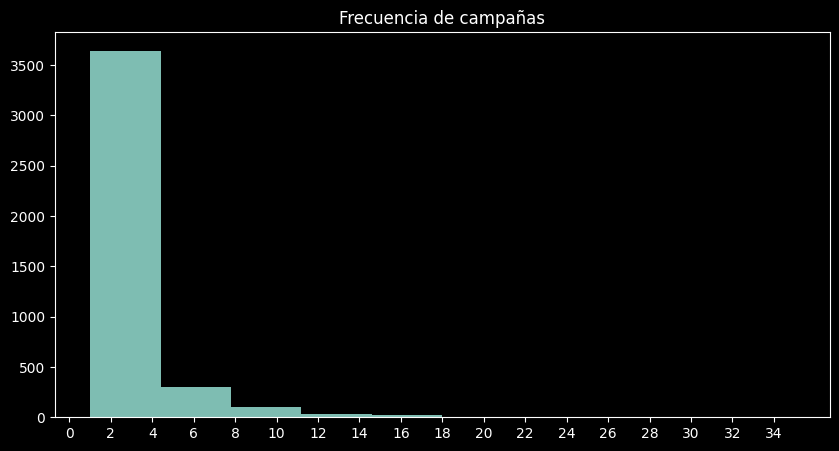

In [14]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.hist(bank_df['campaign'], bins=10, alpha=.9)
plt.xticks(range(0,35,+2))
ax.set_title('Frecuencia de campañas');

#### Grafico de barras o BarPlot

#### Mi intención ahora es mostrar con una grafico de barras de cuales fueron las campañas más exitosas, las que tuvieron mejores resultados, para lo cual tendremos 1ro que utilziar una función de agregación sobre las campañas que obtuvieron un yes

In [15]:
# agrupamos los datos por campaña y contamos la cantidad de 'yes' en la columna 'y'
camp_yes = bank_df[bank_df['y'] == 'yes'].groupby('campaign')['y'].count()
camp_yes # agregamos la variable para imprimirla en pantalla

campaign
1     219
2     119
3      62
4      32
5       9
6       4
7       1
8       2
9       1
10      1
11      1
Name: y, dtype: int64

In [16]:
# vamos a crear las variables para los ejes X e Y
x = camp_yes.index
y = camp_yes.values

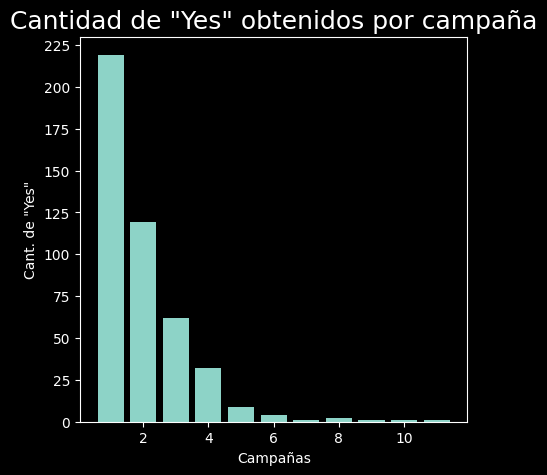

In [17]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.bar(x,y)

plt.yticks(range(0,(max(y)+25),+25)) # agregamos ticks de 25 en 25, el predeterminado salia de a 50, para tener mejor nocion de los valores
ax.set_title('Cantidad de "Yes" obtenidos por campaña', fontsize=(18))
ax.set_ylabel('Cant. de "Yes"')
ax.set_xlabel('Campañas');

### PieChart o Grafico de Tortas

#### por último vamos a graficar un pie chart (a pesar que al profe no le gustan xD) con pocas variables para que sea entendible (el gran problema de los pie charts). La intención es ver si las campañas tienen más llegada a personas en pareja o solteros/divorciados/viudos

In [18]:
marital = bank_df['marital'].unique()
marital

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [19]:
# Agrupar los datos por 'marital' y contar los 'yes'
pie_grouped = bank_df.groupby("marital")["y"].value_counts().reset_index(name="count") # agregué ese metodo de .reset_index para ver si podemos superar el error: cannot unpack non-iterable int objetct
pie_grouped

,marital,y,count
0,divorced,no,403
1,divorced,yes,43
2,married,no,2257
3,married,yes,252
4,single,no,998
5,single,yes,155
6,unknown,no,10
7,unknown,yes,1


In [20]:
# Se le pasan 2 listas al pie chart asi que las vamos a crear y con un for loop vamos a llenar estas listas
pie_values = []
pie_labels = []

In [21]:
bank_df.shape[0]

4119

In [22]:
# arrancamos el for loop
for i, row in pie_grouped.iterrows(): #TypeError: cannot unpack non-iterable int object, metimos pie_grouped en un df para y ahora nos deja iterar y llamamos .iterrows()
    if row['y'] == "yes": # me interesan los 'yes' el resto no asi que vamos con un if
        pie_media = row["count"] / bank_df.shape[0] *100 #calculamos el %% de yes para cada valor de 'marital'
        # y ahora le actualizamos los valores a las listas que usaremos para graficar
        pie_values.append(pie_media)
        pie_labels.append(row['marital'])

In [23]:
pie_values # exploramos como quedaron los datos

[1.043942704539937,
 6.117989803350328,
 3.7630492838067493,
 0.024277737314882253]

In [24]:
pie_labels # verificamos que esten bien las etiquetas

['divorced', 'married', 'single', 'unknown']

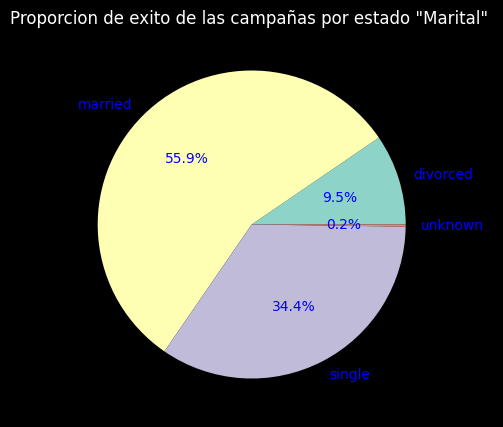

In [25]:
# graficamos
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.pie(pie_values, labels=pie_labels, autopct="%1.1f%%") #agregamos esta linea para ponerle los %% dentro del gráfico, por defecto quedan por fuera.
ax.set_title('Proporcion de exito de las campañas por estado "Marital" ')
for text in ax.texts:
  text.set_color('blue'); # cambié el color

### Seaborn

In [26]:
import seaborn as sns

ya importada la libreria, vamos a tratar de armar los graficos con seaborn ahora, algunos los repetiremos para ver las diferencias de unos y otros y en vez de hacer piechart que seaborn no tiene aprovecharemos para hacer alguno de esos bonitos como violin o un boxplot

#### Histograma

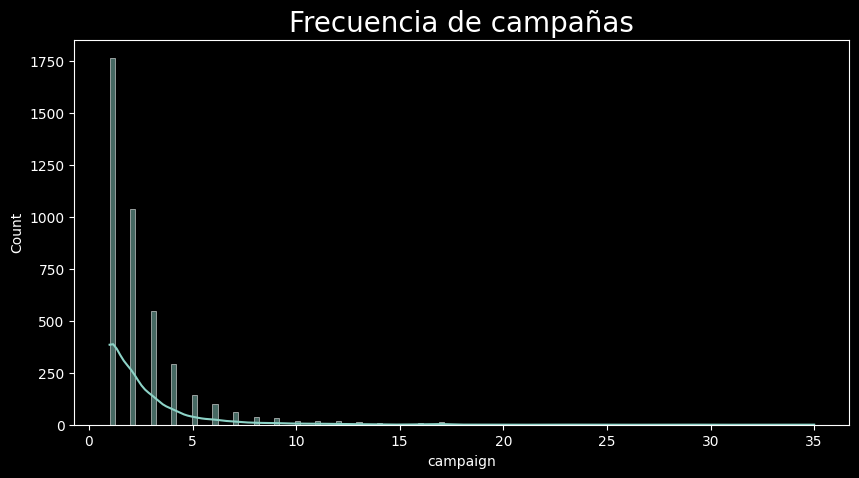

In [27]:
#copiamos los datos dle histograma que hicimos en matplotlib para tenerlos a mano pero los comentamos para no hacer lio
#fig, ax = plt.subplots(1,1, figsize=(10,5))
#ax.hist(bank_df['campaign'], bins=10, alpha=.9)
#plt.xticks(range(0,35,+2));
fig, ax = plt.subplots(1,1, figsize=(10,5)) #empezamos con el lienzo como en matplotlib

sns.histplot(data=bank_df['campaign'], kde=True)
ax.set_title('Frecuencia de campañas', fontsize=20); #a seaborn le pasamos el dataset, en este caos 1 sola columna con kde podemos agregar la curva de la disperción.

#### Grafico de Barras o BarPlor para los amigos

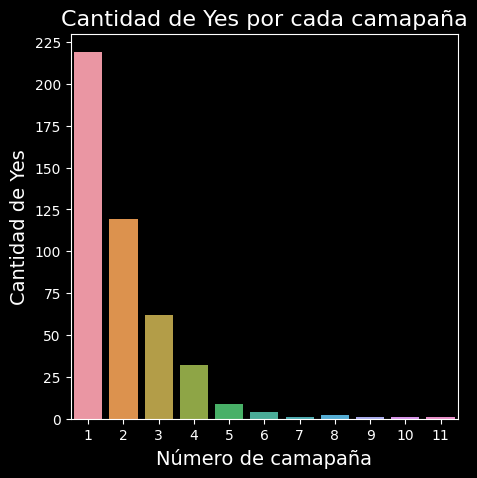

In [28]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.barplot(x=x, y=y)
ax.set_ylabel('Cantidad de Yes', fontsize=(14))
ax.set_xlabel('Número de camapaña', fontsize=(14))
ax.set_title('Cantidad de Yes por cada camapaña', fontsize=(16))
plt.yticks(range(0,max(y)+25, +25)); # seteamos el rango de ticks y su crecimiento

#### BoxPlot o gráfico de cajas
para este caso vamos a re-graficar los datos del barplot pero ahora en un grafico de cajas para comparar cual muestra la data de una forma más intuitiva

In [29]:
# voy a cambiar los valores "yes" de la columna 'y' del DF por valores "si" para que quede en español el grafico
prueba = bank_df['y'] # primero copiamos en una nueva variable la columna 'y' para no modificar el dataset

In [30]:
prueba.sample(10) #la imprimimos a ver si esta ok

2849     no
3499     no
3907     no
1505     no
1778     no
3151    yes
2925     no
698      no
3560     no
321      no
Name: y, dtype: object

In [31]:
# ahora con el poderoso for loop vamos a iterar entre todos los valores de la columna y cambiaremos solo los que se llamen "yes" por uno que se llame "si"
for i in range(len(prueba)): #aca seteamos la variable iteradora con i, y le pasamos el rango que sera el largo de nuestor nuevo objeto prueba, que es copia de la columna 'y' del DF
    if prueba[i] == "yes": # acá le pasamos la condicion si prueba[en el indice que marque la variable i] es igual a 'yes'
        prueba[i] = "si" # aca le decimos que hacer si lo de arriba se cumple, q seria a ese indice de prueba lo cambiaremos por 'si'

C:\Users\guill\AppData\Local\Temp\ipykernel_23860\3544811234.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prueba[i] = "si" # aca le decimos que hacer si lo de arriba se cumple, q seria a ese indice de prueba lo cambiaremos por 'si'


In [32]:
prueba[59] # me fijo en un indice que conozco era 'yes' y ahora sale 'si! es todo un éxito

'si'

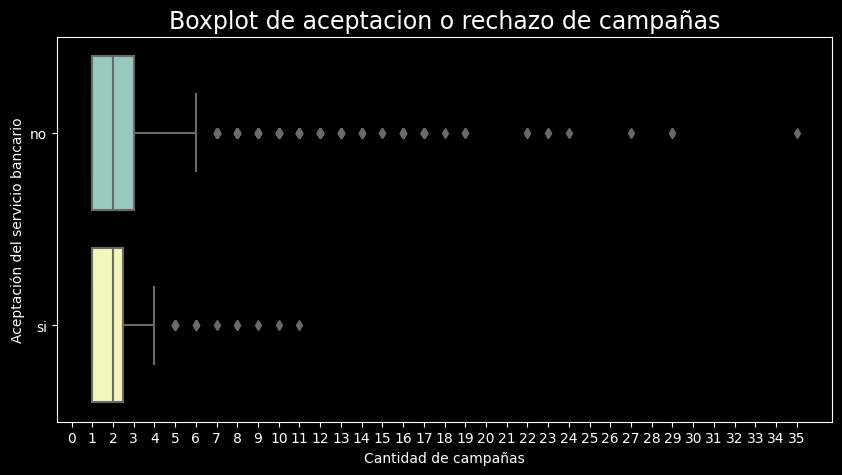

In [33]:
# comenzamos a trabajar con seaborn
fig, ax = plt.subplots(1,1, figsize=(10,5)) #cambiamos el tamaño del figsize porque eran muchas campañas y quedaba todo amontonado sino
sns.boxplot(data= bank_df, x='campaign', y=prueba) #le pasamos en vez de la columna 'y' la nueva variable "prueba" para que grafique con 'si' y 'no', en vez de 'yes' y 'no'
plt.xticks(range(0, max(bank_df['campaign'])+1, +1)) # con esta linea le cambiamos los ticks del eje X para darle más visibilidad y que no se amontonen
ax.set_title('Boxplot de aceptacion o rechazo de campañas', fontsize=17) # titulos..
ax.set_xlabel('Cantidad de campañas') # labels, nada que explicar
ax.set_ylabel('Aceptación del servicio bancario');

Agregandole los xticks y agrandando el figsize a (10,5) si se empieza a apreciar la info que nos tira a la cara, vemos que hay gente que incluso desp de 35 camapñas sigue rechazando.
tmb le agregamos titulo y labels para que todo sea mas entendible y quedo pipi-cucu

### Verificando correlaciones de variables
para ello lo 1ro que tenemos que hacer es corroborar si hay NaN (ya que nos va a traer problemas en los proximos pasos) si hay tendremos que decidir que hacemso con ellos y sino seguimos

In [34]:
bank_df.isnull().sum() # afortunadamente no hay nulls / NaN en el df, podemos seguir con el proximo paso que es codificar las columnas categoricas.

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Ahora toca codificar las columans categoricas que usaremos para el analisis, esas son 'y' 'job' y 'education' cuando esten codificadas vamos a poder ver su correlacion con la variable de respuesta de la columan y, pero para eso necesitamos codificar todo a numeros.

In [35]:
bank_df_2 = bank_df # hacemos una copia del DF para no romepr nada

### Manual Encoder
Vamos a usar este método para la variable respuesta porque es binaria, asi que no precisamos ningún metodo mas complejo, con 0 y 1 nos sobra. El 0 equivaldrá a 'NO' y el 1 a 'SI'
Elijo este método por sobre "one hot encoder" porque no quiero llenar de columnas innecesariamente al dataframe y creo que es mas legible con label encoder y sinceramente no veo necesario utilziar metodos como Label Encoder porque al ser binario es mas facil y rapido hacerlo manual. Ya veremos otros metodos en otras columnas

In [36]:
# creo una nueva columna codificando los 'si' en 1 y los 'no' en 0 para poder ver las correlaciones
bank_df_2['y codif'] = bank_df_2['y'].map({'si': 1, 'no': 0})
bank_df_2.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y codif
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no,0
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no,0
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no,0
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0


### Label Encoder
Vamos a usar este metodo para las columans job y education, para ello nos serviremos de la libreria scikitlearn/labelencoder.

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
bank_df_2['job'].unique() #traemos la lista de jobs de la columan a codificar para ver con que trabajamos

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

In [39]:
bank_df_2['education'].unique() # hacemos lo mismo con la otra columna a codificar 'education'

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [40]:
# instanciamos
encoder_job = LabelEncoder()
encoder_education = LabelEncoder()

In [41]:
# les cargamos la data a los encoders
encoder_job.fit(bank_df_2['job'])
encoder_education.fit(bank_df_2['education'])

LabelEncoder()

In [42]:
# y con este metodo cambiamos la data a la codificada y la igualamos/guardamos en una nueva columna
bank_df_2['codif job'] = encoder_job.transform(bank_df_2['job'])
bank_df_2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y codif,codif job
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0,1
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0,7
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0,7
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0,7
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no,0,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no,0,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no,0,8
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,0,0


In [43]:
bank_df_2['job'].unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

In [44]:
bank_df_2['codif job'].unique()

array([ 1,  7,  0,  2,  6,  9,  4,  8,  5,  3, 10, 11])

### Codificacion de JOB

| Llave | Valor         |
|-------|---------------|
| 0     | admin         |
| 1     | blue-collar   |
| 2     | entrepreneur  |
| 3     | housemaid     |
| 4     | management    |
| 5     | retired       |
| 6     | self-employed |
| 7     | services      |
| 8     | student       |
| 9     | technician    |
| 10    | unemployed    |
| 11    | unknown       |


In [45]:
# repetimos proceso con education
bank_df_2['codif education'] = encoder_education.transform(bank_df_2['education'])
bank_df_2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y codif,codif job,codif education
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0,1,2
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0,7,3
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0,7,3
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0,7,2
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no,0,0,1
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no,0,0,3
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,failure,-1.8,92.893,-46.2,1.354,5099.1,no,0,8,3
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,0,0,3


In [46]:
bank_df_2['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [47]:
bank_df_2['codif education'].unique()

array([2, 3, 6, 5, 1, 0, 7, 4])

### Codificacion de education
| Llave | Valor               |
|-------|---------------------|
| 0     | basic.4y            |
| 1     | basic.6y            |
| 2     | basic.9y            |
| 3     | high.school         |
| 4     | illiterate          |
| 5     | professional.course |
| 6     | university.degree   |
| 7     | unknown             |

In [48]:
# creo una nueva variable para alojar todas las columnas numericas y ver si tienen correlacion con la columna objetivo del analisis 'y' ahora codificada a 'y codif'
num_cols = bank_df_2.select_dtypes(include=np.number).columns
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'y codif', 'codif job', 'codif education'],
      dtype='object')

In [49]:
# todos los valores cercanos a 0, significa que no hay correlación o que es mínima, todos los valores cercanos a -1 o 1 es que la corelacion es alta
# inversamente proporcional o directamente proporcional respectivamente
bank_df_2[num_cols].corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y codif,codif job,codif education
age,1.000000,0.041299,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135,-0.015033,-0.041936,0.060374,0.014618,-0.125520
duration,0.041299,1.000000,-0.085348,-0.046998,0.025724,-0.028848,0.016672,-0.034745,-0.032329,-0.044218,0.418565,-0.016325,0.000016
campaign,-0.014169,-0.085348,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882,0.159435,0.161037,-0.076091,0.002553,0.015626
pdays,-0.043425,-0.046998,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090,0.301478,0.381983,-0.332012,-0.007936,-0.060828
previous,0.050931,0.025724,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420,-0.458851,-0.514853,0.255697,0.024140,0.045926
emp.var.rate,-0.019192,-0.028848,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022,0.970308,0.897173,-0.283216,-0.021355,-0.057203
cons.price.idx,-0.000482,0.016672,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835,0.657159,0.472560,-0.098326,-0.004887,-0.086454
cons.conf.idx,0.098135,-0.034745,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000,0.276595,0.107054,0.054393,0.039656,0.112925
euribor3m,-0.015033,-0.032329,0.159435,0.301478,-0.458851,0.970308,0.657159,0.276595,1.000000,0.942589,-0.298565,-0.019559,-0.048882
nr.employed,-0.041936,-0.044218,0.161037,0.381983,-0.514853,0.897173,0.472560,0.107054,0.942589,1.000000,-0.349241,-0.033605,-0.062012


In [50]:
np.cov(bank_df_2['y codif'], bank_df_2['codif job'])

array([[ 0.09752764,  0.03009815],
       [ 0.03009815, 13.0055353 ]])

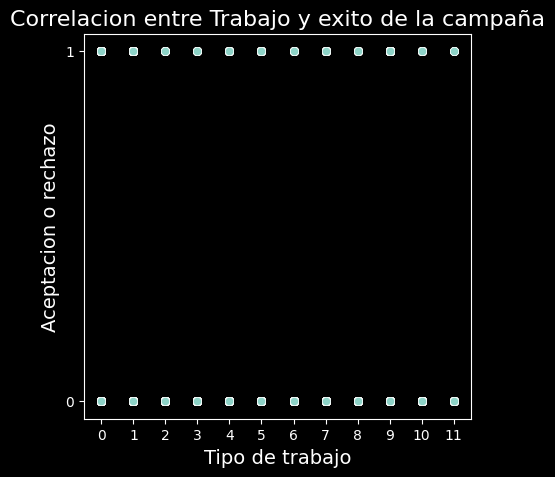

In [56]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.scatterplot(x=bank_df_2['codif job'], y=bank_df_2['y codif'])
ax.set_ylabel('Aceptacion o rechazo', fontsize=(14))
ax.set_xlabel('Tipo de trabajo', fontsize=(14))
ax.set_title('Correlacion entre Trabajo y exito de la campaña', fontsize=(16))
plt.yticks(range(0,2,+1))
plt.xticks(range(0,12));

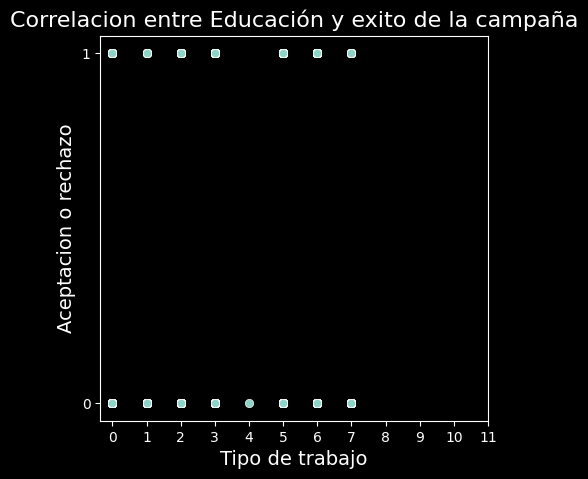

In [57]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.scatterplot(x=bank_df_2['codif education'], y=bank_df_2['y codif'])
ax.set_ylabel('Aceptacion o rechazo', fontsize=(14))
ax.set_xlabel('Tipo de trabajo', fontsize=(14))
ax.set_title('Correlacion entre Educación y exito de la campaña', fontsize=(16))
plt.yticks(range(0,2,+1))
plt.xticks(range(0,12));

Vemos que no hay una relacion lineal entre los entre las variables 'Job' y 'Education', lo cual no significa que no haya relaciones, pero si sabemos que no son lineales.

In [53]:
np.cov(bank_df_2['y codif'], bank_df_2['codif education'])

array([[0.09752764, 0.04518961],
       [0.04518961, 4.62072833]])

In [54]:
np.corrcoef(bank_df_2['y codif'], bank_df_2['codif job'])

array([[1.        , 0.02672463],
       [0.02672463, 1.        ]])

In [55]:
np.corrcoef(bank_df_2['y codif'], bank_df_2['codif education'])

array([[1.        , 0.06731618],
       [0.06731618, 1.        ]])

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.heatmap(data[num_cols].corr(), cmap='BrBG', vmin=-1)

## Reduccion de dimensionalidad

In [60]:
df_reduced = bank_df_2.loc[:, ['y codif', 'codif job', 'codif education']] # con esta linea creamos un nuevo dataset para trabajar solo con las 3 variables dle analisis, que ya les pasamos 
# el encoder, ya habiamos buscando NaN's al principio del analisis y no tenemos nada de eso en neustros datos

In [61]:
df_reduced

,y codif,codif job,codif education
0,0,1,2
1,0,7,3
2,0,7,3
3,0,7,2
4,0,0,6
...,...,...,...
4114,0,0,1
4115,0,0,3
4116,0,8,3
4117,0,0,3


## Eligiendo algoritmos para entrenar el modelo
### inicialmente voy a probar 2 algoritmos para ver cual funciona mejor y veremos la necesidad de probar un 3ro si hace falta
### Los algoritmos elegidos son Random Forest y SVM

In [75]:
from sklearn.tree import DecisionTreeClassifier # este será el 1er algoritmos que probaré y sumaremos svm y random forest para comparar
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score # ya traemos metrics para poder hacer las comparaciones

In [67]:
# empezamos separando lso datos en variables predictoras y de respuesta
X = df_reduced.drop('y codif', axis=1) # el axis es para indicar que dropee verticalmente, o sea la columna
y = df_reduced['y codif']

In [68]:
X

,codif job,codif education
0,1,2
1,7,3
2,7,3
3,7,2
4,0,6
...,...,...
4114,0,1
4115,0,3
4116,8,3
4117,0,3


In [69]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y codif, Length: 4119, dtype: int64

### Divición de los datos en entrenamiento y test

In [71]:
from sklearn.model_selection import train_test_split # importamos de scikitlearn la funcion de split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # vamos a elegir %30 para test porque tenemos unas cuantas rows, nos van a quedar cerca de 3k para entrenar

In [72]:
X_train

,codif job,codif education
136,0,6
421,0,3
1626,3,7
3242,1,2
1890,7,3
...,...,...
1028,9,5
1400,9,6
949,11,7
222,0,5


In [73]:
X_test

,codif job,codif education
432,2,6
1930,9,6
3204,1,0
2271,9,5
165,0,3
...,...,...
920,7,3
3559,1,0
2240,7,5
2441,3,6


## Creando los modelos
instanciamos los 3

In [76]:
dt = DecisionTreeClassifier()  # este es el 1er algoritmo que me vino a la cabeza para usar en este problema de clasificación, pero elegimos 2 mas para comparar
rf = RandomForestClassifier() # este es una combinacion de arboles de decisión
svm = SVC() # maquina de vectores de soporte, es el algoritmo que divide en hiperplanos para maximizar el margen entre clases

### Entrenando

In [77]:
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC()

### Prediccones

In [81]:
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [82]:
y_pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
y_pred_svm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

a simple vista no vamos a entender nada si esto funciona o no, asi que vamos a codificar un poco para evaluar el rendimiento de cada uno
### Calculo de métricas
Accuracy: empezamos por el accuracy de cada modelo que es la cantidad de aciertos en el total de predicciones de cada modelo ((TP+TN)/T) rango 1-0

In [87]:
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_dt

0.8972491909385113

In [88]:
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_rf

0.8972491909385113

In [89]:
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_svm

0.8956310679611651

el accuracy dio alto en los 3 algoritmos, cerca del 90% de precision
ahora veamos otras métricas a ver como se comportan

exhaustividad/recall/sensitivity: mide la proporción de instancias positivas que fueron correctamente clasificadas como positivas siguiendo la logica TP/(TP+FN) rango 1-0. mide la capasidad del algoritmo clasificador de encontrar todas las muestras positivas

precision: La precisión mide la proporción de instancias clasificadas como positivas que son realmente positivas de forma que TP/(TP+FP). parece ser lo mismo que accuracy pero no porque esta metrica hace hincapie en no etiquetar una muestra positiva que es negativa. rango 1-0

f1_score:  El F1-score es la media armónica entre la precisión y la exhaustividad. 2*((precision-recall)/(precision+recall)) rango 1-0 y marca la contribución relativa de precision y recall

In [96]:
from sklearn.metrics import recall_score, precision_score, f1_score
rec_dt = recall_score(y_test, y_pred_dt)
rec_rf = recall_score(y_test, y_pred_rf)
rec_svm = recall_score(y_test, y_pred_svm)

In [92]:
rec_dt

0.023255813953488372

In [93]:
rec_rf

0.023255813953488372

In [94]:
rec_svm

0.0

In [105]:
prec_dt = precision_score(y_test, y_pred_dt)
prec_rf = precision_score(y_test, y_pred_rf)
prec_svm = precision_score(y_test, y_pred_svm, zero_division=0) # agregué el zero_division por un error, parece que estaba prediciendo 0 afirmaciones y no podia hacer la div

In [102]:
prec_dt

0.75

In [103]:
prec_rf

0.75

In [106]:
prec_svm

0.0

In [98]:
f1_dt = f1_score(y_test, y_pred_dt)
f1_rf = f1_score(y_test, y_pred_rf)
f1_svm = f1_score(y_test, y_pred_svm)

In [99]:
f1_dt

0.045112781954887216

In [100]:
f1_rf

0.045112781954887216

In [101]:
f1_svm

0.0

## Conclusiones de las metricas
### Decision Tree: f1 = 0.045 / precision = 0.75 / recall = 0.023 / accuracy = 0.897
f1 muy bajo esto significaria una baja contribución relativa entre recall (0.023) y precision(0.75), llama la atencion que en todos los algoritmos da bajo
### Random Forest: f1 = 0.045 / precision = 0.75 / recall = 0.023 / accuracy = 0.897
esperaba valroes muy similares al decision tree, pero no me esperaba que sean identicos.
### SVM: f1 = 0.0 / precision = 0.0 / recall = 0.0 / accuracy = 0.895
acá tenemos un problema claro, el modelo está clasificando todas las instancias positivas como negativas, pero el accuracy alto, me hace pensar que esta clasificando bien las negativas, solo que erró en todas las positivas.... me lleva a pensar que debe haber clasificado a todo como negativo, como hay muchos más NO que SI en el datset eso le da un accuracy alto pero falla en las demás metricas.